In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')


<AxesSubplot:>

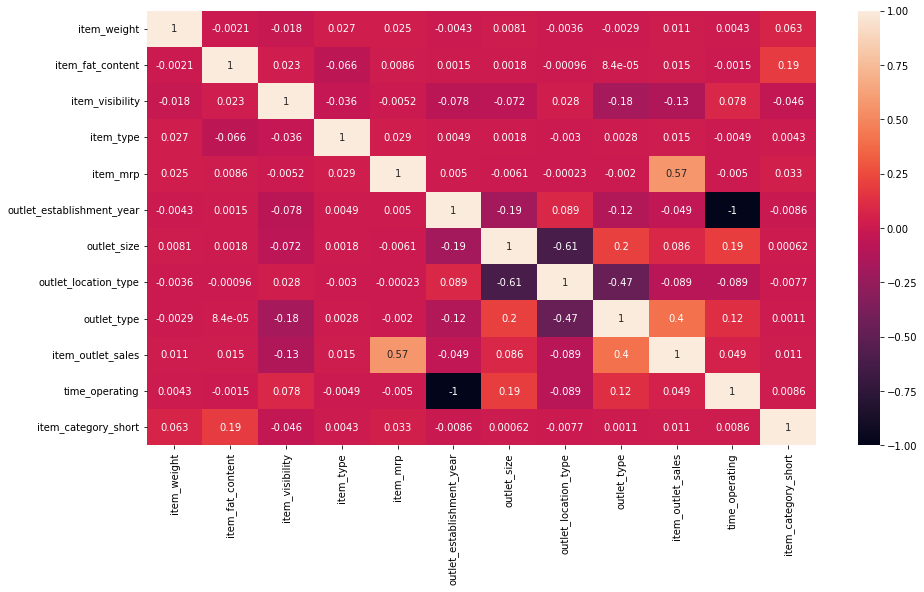

In [10]:
plt.figure(figsize=(15, 8))
sns.heatmap(data=train.corr(), annot = True)

Outlet_size = high correlated with outlet_location_type
time_operating = high correlated with outlet_stablishment_year
Outlet_type = high outlet_location_type

In [29]:
from sklearn.model_selection import train_test_split

cols = ['item_outlet_sales', 'outlet_size', 'time_operating', 'outlet_type']

X = train.drop(columns = cols)
y = train['item_outlet_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

print('R2: ', r2_score(y_true = y_test, y_pred = y_pred))
print('Mean Square: ', np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred)))
print('Real mean: ', train.item_outlet_sales.mean())

R2:  0.3458065553877824
Mean Square:  1333.4459869949335
Real mean:  2181.288913575032


# Variable Selection

statsmodel

In [32]:
import statsmodels.regression.linear_model as sm

In [33]:
X_opt = X_train.copy()

ols = sm.OLS(endog = y_train, exog = X_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      item_outlet_sales   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              2587.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:33:26   Log-Likelihood:                         -59019.
No. Observations:                6818   AIC:                                  1.181e+05
Df Residuals:                    6810   BIC:                                  1.181e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
item_weight                  -2.8998      4.000     -0.725      0.468     -10.741       4.941
item_fat_content             31.9735     19.228      1.663      0.096      -5.719      69.666
item_visibility           -4798.1717    347.950    -13.790      0.000   -5480.262   -4116.081
item_type                    -0.1998      4.145     -0.048      0.962      -8.326       7.926
item_mrp                     15.5446      0.270     57.648      0.000      15.016      16.073
outlet_establishment_year     0.3705      0.046      8.138      0.000       0.281       0.460
outlet_location_type       -188.1371     20.813     -9.039      0.000    -228.938    -147.337
item_category_short         -40.0927     32.892     -1.219      0.223    -104.572      24.386
==============================================================================
Omnibus:                      593.757   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1223.873
Skew:                           0.572   Prob(JB):                    1.74e-266
Kurtosis:                       4.732   Cond. No.                     4.14e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X_opt = X_train.drop(columns = ['item_type'])

ols = sm.OLS(endog = y_train, exog = X_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      item_outlet_sales   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              2957.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:33:27   Log-Likelihood:                         -59019.
No. Observations:                6818   AIC:                                  1.181e+05
Df Residuals:                    6811   BIC:                                  1.181e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
item_weight                  -2.9037      3.999     -0.726      0.468     -10.742       4.935
item_fat_content             32.0385     19.179      1.670      0.095      -5.558      69.635
item_visibility           -4797.5777    347.706    -13.798      0.000   -5479.190   -4115.965
item_mrp                     15.5443      0.270     57.667      0.000      15.016      16.073
outlet_establishment_year     0.3698      0.044      8.477      0.000       0.284       0.455
outlet_location_type       -188.1370     20.812     -9.040      0.000    -228.934    -147.340
item_category_short         -40.1144     32.887     -1.220      0.223    -104.583      24.354
==============================================================================
Omnibus:                      593.668   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1223.611
Skew:                           0.572   Prob(JB):                    1.98e-266
Kurtosis:                       4.732   Cond. No.                     4.13e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
X_opt = X_train.drop(columns = ['item_type', 'item_weight'])

ols = sm.OLS(endog = y_train, exog = X_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      item_outlet_sales   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              3450.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:33:27   Log-Likelihood:                         -59019.
No. Observations:                6818   AIC:                                  1.181e+05
Df Residuals:                    6812   BIC:                                  1.181e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
item_fat_content             32.1437     19.178      1.676      0.094      -5.451      69.738
item_visibility           -4793.1471    347.640    -13.788      0.000   -5474.631   -4111.663
item_mrp                     15.5411      0.270     57.665      0.000      15.013      16.069
outlet_establishment_year     0.3520      0.036      9.764      0.000       0.281       0.423
outlet_location_type       -188.0294     20.810     -9.035      0.000    -228.824    -147.234
item_category_short         -41.8270     32.801     -1.275      0.202    -106.127      22.473
==============================================================================
Omnibus:                      593.840   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1222.947
Skew:                           0.572   Prob(JB):                    2.76e-266
Kurtosis:                       4.731   Cond. No.                     4.13e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X_opt = X_train.drop(columns = ['item_type', 'item_weight', 'item_category_short'])

ols = sm.OLS(endog = y_train, exog = X_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      item_outlet_sales   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              4139.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:33:27   Log-Likelihood:                         -59020.
No. Observations:                6818   AIC:                                  1.180e+05
Df Residuals:                    6813   BIC:                                  1.181e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
item_fat_content             27.5237     18.833      1.461      0.144      -9.396      64.443
item_visibility           -4774.1885    347.338    -13.745      0.000   -5455.080   -4093.297
item_mrp                     15.5322      0.269     57.649      0.000      15.004      16.060
outlet_establishment_year     0.3310      0.032     10.321      0.000       0.268       0.394
outlet_location_type       -187.9118     20.811     -9.029      0.000    -228.708    -147.115
==============================================================================
Omnibus:                      594.741   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1225.747
Skew:                           0.573   Prob(JB):                    6.80e-267
Kurtosis:                       4.733   Cond. No.                     4.13e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
X_opt = X_train.drop(columns = ['item_type', 'item_weight', 'item_category_short', 'item_fat_content'])

ols = sm.OLS(endog = y_train, exog = X_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      item_outlet_sales   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              5172.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:33:27   Log-Likelihood:                         -59021.
No. Observations:                6818   AIC:                                  1.181e+05
Df Residuals:                    6814   BIC:                                  1.181e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
item_visibility           -4760.4817    347.241    -13.709      0.000   -5441.182   -4079.782
item_mrp                     15.5312      0.269     57.641      0.000      15.003      16.059
outlet_establishment_year     0.3430      0.031     11.063      0.000       0.282       0.404
outlet_location_type       -187.8920     20.813     -9.028      0.000    -228.692    -147.092
==============================================================================
Omnibus:                      594.155   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1223.819
Skew:                           0.572   Prob(JB):                    1.78e-266
Kurtosis:                       4.731   Cond. No.                     4.13e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
X_opt = X_train.drop(columns = ['item_type', 'item_weight', 'item_category_short', 'item_fat_content'])

ols = sm.OLS(endog = y_train, exog = X_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      item_outlet_sales   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              5172.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:34:17   Log-Likelihood:                         -59021.
No. Observations:                6818   AIC:                                  1.181e+05
Df Residuals:                    6814   BIC:                                  1.181e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
item_visibility           -4760.4817    347.241    -13.709      0.000   -5441.182   -4079.782
item_mrp                     15.5312      0.269     57.641      0.000      15.003      16.059
outlet_establishment_year     0.3430      0.031     11.063      0.000       0.282       0.404
outlet_location_type       -187.8920     20.813     -9.028      0.000    -228.692    -147.092
==============================================================================
Omnibus:                      594.155   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1223.819
Skew:                           0.572   Prob(JB):                    1.78e-266
Kurtosis:                       4.731   Cond. No.                     4.13e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
tree_2 = DecisionTreeRegressor(max_depth=2)
tree_5 = DecisionTreeRegressor(max_depth=7)
tree_2.fit(X_train, y_train)
tree_5.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [62]:
y_pred_2 = tree_2.predict(X_test)
y_pred_5 = tree_5.predict(X_test)

In [63]:
print('R2: ', r2_score(y_true = y_test, y_pred = y_pred_2))
print('Mean Square: ', np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_2)))
print('Real mean: ', train.item_outlet_sales.mean())

R2:  0.3154111845393416
Mean Square:  1364.0718120255506
Real mean:  2181.288913575032


In [64]:
print('R2: ', r2_score(y_true = y_test, y_pred = y_pred_5))
print('Mean Square: ', np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_5)))
print('Real mean: ', train.item_outlet_sales.mean())

R2:  0.5774528260468913
Mean Square:  1071.6671920601277
Real mean:  2181.288913575032
